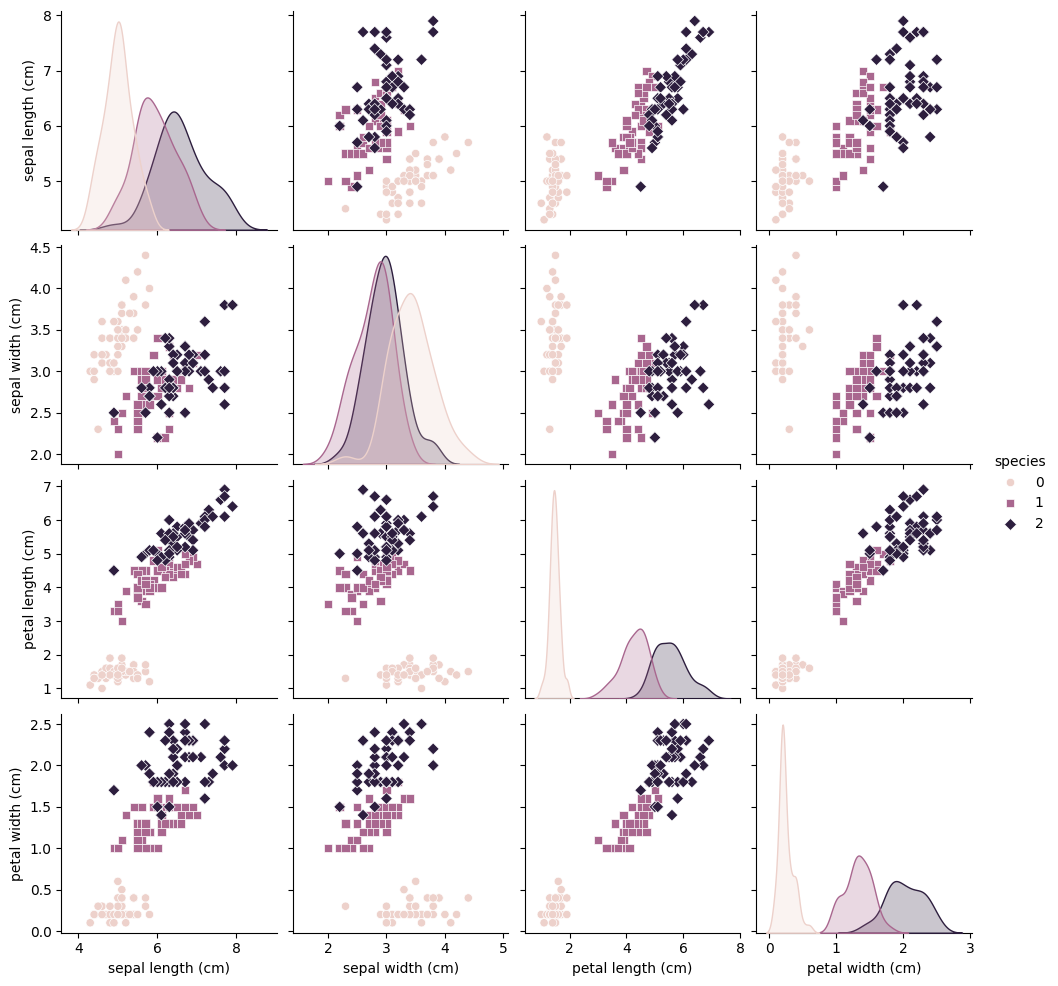

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

# Basic EDA: Pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()

# Display dataset statistics
print(iris_df.describe())


In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
iris_features_scaled = scaler.fit_transform(iris_data.data)


In [3]:
import numpy as np

# Compute the covariance matrix
covariance_matrix = np.cov(iris_features_scaled.T)
print("Covariance matrix:\n", covariance_matrix)


Covariance matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [4]:
# Calculate the eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# Print eigenvalues and eigenvectors
print("Eigenvalues:\n", eig_values)
print("Eigenvectors:\n", eig_vectors)


Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [5]:
# Sort eigenvectors by decreasing eigenvalues
sorted_indices = np.argsort(eig_values)[::-1]
sorted_eig_values = eig_values[sorted_indices]
sorted_eig_vectors = eig_vectors[:, sorted_indices]

# Project the data onto the first two principal components
iris_pca_projection = iris_features_scaled.dot(sorted_eig_vectors[:, :2])

# Create a DataFrame for visualization
pca_df = pd.DataFrame(iris_pca_projection, columns=['PC1', 'PC2'])
pca_df['species'] = iris_data.target


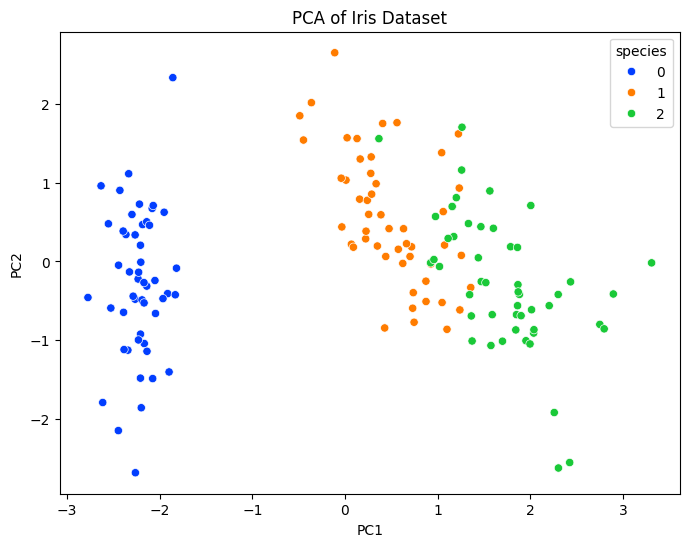

In [6]:
# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='bright')
plt.title('PCA of Iris Dataset')
plt.show()


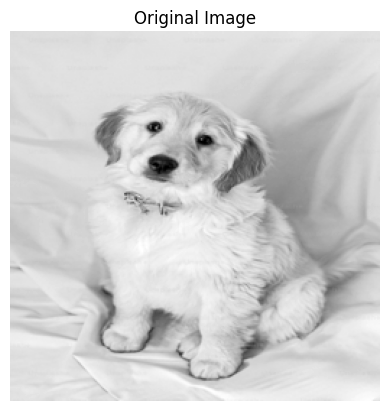

Image shape: (256, 256)


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image and convert it to grayscale
image_path = '/content/Dog image.jpeg'  # Replace with the path to your image
img = Image.open(image_path).convert('L')  # 'L' mode converts the image to grayscale

# Resize the image to 256x256 if necessary
img = img.resize((256, 256))

# Display the original image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Convert the image to a NumPy array
img_array = np.array(img)
print("Image shape:", img_array.shape)


In [13]:
# Reshape the image into a 2D array (each row is a pixel, each column is a feature)
reshaped_image = img_array.reshape(-1, 256)  # Reshape to (256, 256)
print("Reshaped Image shape:", reshaped_image.shape)


Reshaped Image shape: (256, 256)


In [14]:
from sklearn.decomposition import PCA

# Apply PCA to the image data
def apply_pca_to_image(image_data, n_components):
    pca = PCA(n_components=n_components)
    image_pca = pca.fit_transform(image_data)
    image_reconstructed = pca.inverse_transform(image_pca)
    return image_reconstructed

# Try different numbers of principal components
pca_components = [5, 20, 50, 100]
reconstructed_image_list = []

for components in pca_components:
    reconstructed_image = apply_pca_to_image(reshaped_image, components)
    reconstructed_image_list.append(reconstructed_image.reshape(256, 256))


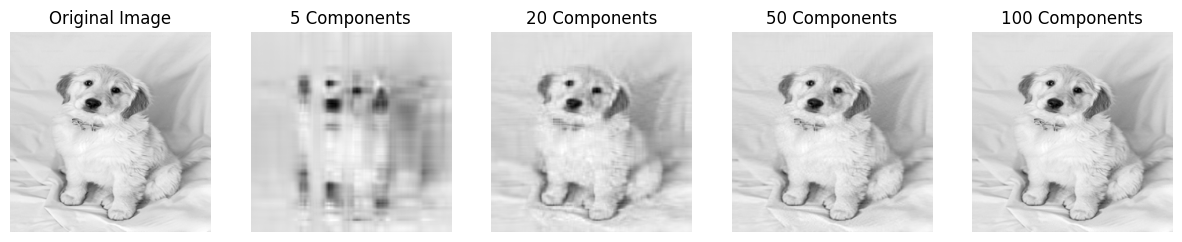

In [15]:
# Plot the original and reconstructed images
fig, axes = plt.subplots(1, len(pca_components) + 1, figsize=(15, 5))

# Plot original image
axes[0].imshow(img_array, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot reconstructed images
for i, (ax, components) in enumerate(zip(axes[1:], pca_components)):
    ax.imshow(reconstructed_image_list[i], cmap='gray')
    ax.set_title(f'{components} Components')
    ax.axis('off')

plt.show()


In [17]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for EDA
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train Logistic Regression without PCA
baseline_model = LogisticRegression(max_iter=10000)
baseline_model.fit(X_train, y_train)

# Predict and evaluate the baseline model
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate performance
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, average='weighted')
baseline_recall = recall_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Accuracy: {baseline_accuracy}")
print(f"Baseline Precision: {baseline_precision}")
print(f"Baseline Recall: {baseline_recall}")


Baseline Accuracy: 0.9629629629629629
Baseline Precision: 0.966183574879227
Baseline Recall: 0.9629629629629629


In [23]:
from sklearn.decomposition import PCA

# Function to apply PCA and train the model
def apply_pca_and_train(n_components):
    pca = PCA(n_components=n_components)

    # Apply PCA to training data
    X_train_pca = pca.fit_transform(X_train)

    # Apply the same PCA transformation to test data
    X_test_pca = pca.transform(X_test)

    # Train Logistic Regression on PCA-reduced data
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_pca, y_train)

    # Predict and evaluate the model
    y_pred_pca = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred_pca)
    precision = precision_score(y_test, y_pred_pca, average='weighted')
    recall = recall_score(y_test, y_pred_pca, average='weighted')

    return accuracy, precision, recall

# Test different numbers of components
components_list = [2, 5, 10]
results = {}

for n in components_list:
    accuracy, precision, recall = apply_pca_and_train(n)
    results[n] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
    print(f"PCA with {n} components: Accuracy={accuracy}, Precision={precision}, Recall={recall}")


PCA with 2 components: Accuracy=0.6851851851851852, Precision=0.6736111111111112, Recall=0.6851851851851852
PCA with 5 components: Accuracy=0.9629629629629629, Precision=0.9647793726741095, Recall=0.9629629629629629
PCA with 10 components: Accuracy=0.9629629629629629, Precision=0.966183574879227, Recall=0.9629629629629629


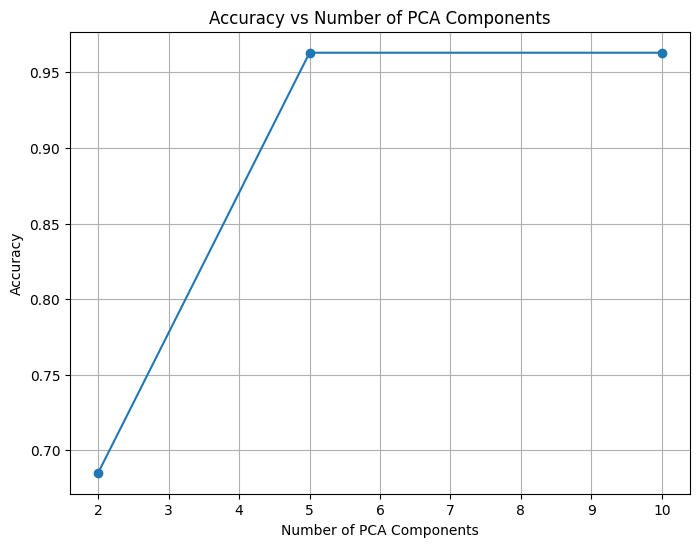

In [24]:
import matplotlib.pyplot as plt

# Plot accuracy vs number of PCA components
components = list(results.keys())
accuracies = [results[n]['Accuracy'] for n in components]

plt.figure(figsize=(8, 6))
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
